# Task 1

In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import StratifiedKFold,KFold,cross_validate
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.model_selection import train_test_split
import scipy.stats
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import confusion_matrix,classification_report,roc_curve
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict,cross_val_score,GridSearchCV,train_test_split
import warnings
warnings.simplefilter(action='ignore')
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.datasets import make_blobs 
from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors

In [35]:
data=pd.read_csv('DS2_C6_S5_Insurance_Data_Challenge.csv')
data
df=data

In [3]:
label=LabelEncoder()
data_c=data.copy()
data_c['sex']=label.fit_transform(data_c['sex'])
data_c['smoker']=label.fit_transform(data_c['smoker'])
data_c['region']=label.fit_transform(data_c['region'])
data_c.dtypes

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object

In [4]:
data_c.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
ss=StandardScaler()
x=ss.fit_transform(data_c)
ds=pd.DataFrame(x,columns=data.columns)
ds.smoker.unique()

array([ 1.97058663, -0.5074631 ])

# Task 2

<AxesSubplot:xlabel='smoker', ylabel='Count'>

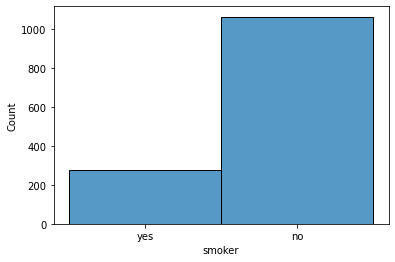

In [14]:
sns.histplot(data,x=data['smoker'])

<AxesSubplot:xlabel='bmi', ylabel='Count'>

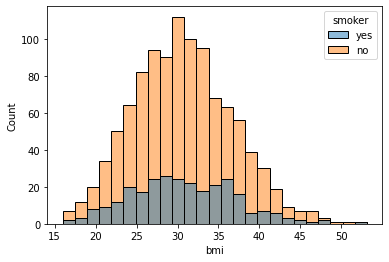

In [13]:
sns.histplot(data,x=data['bmi'],hue=data['smoker'])

<AxesSubplot:xlabel='charges', ylabel='Count'>

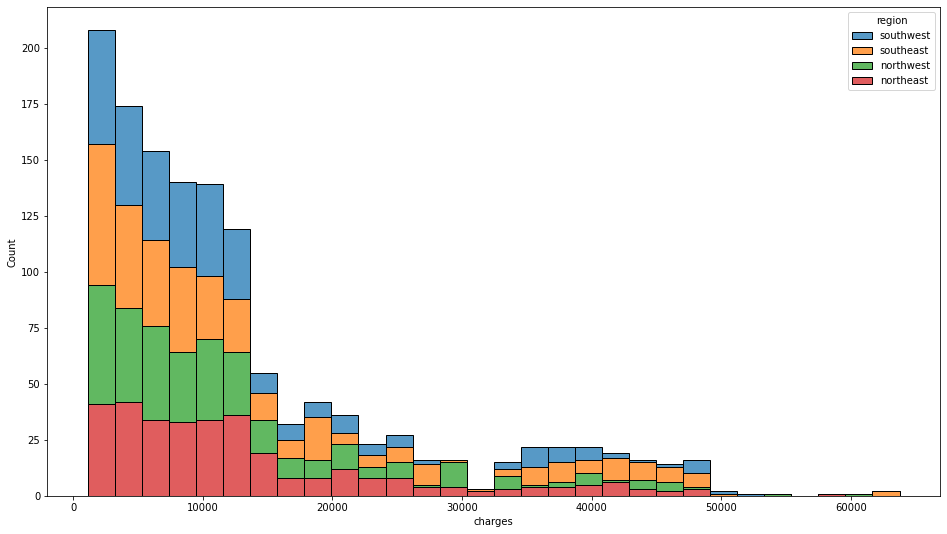

In [15]:
plt.figure(figsize=(16,9))
sns.histplot(data,x=data['charges'],hue=data['region'],multiple='stack')

<AxesSubplot:xlabel='charges', ylabel='Count'>

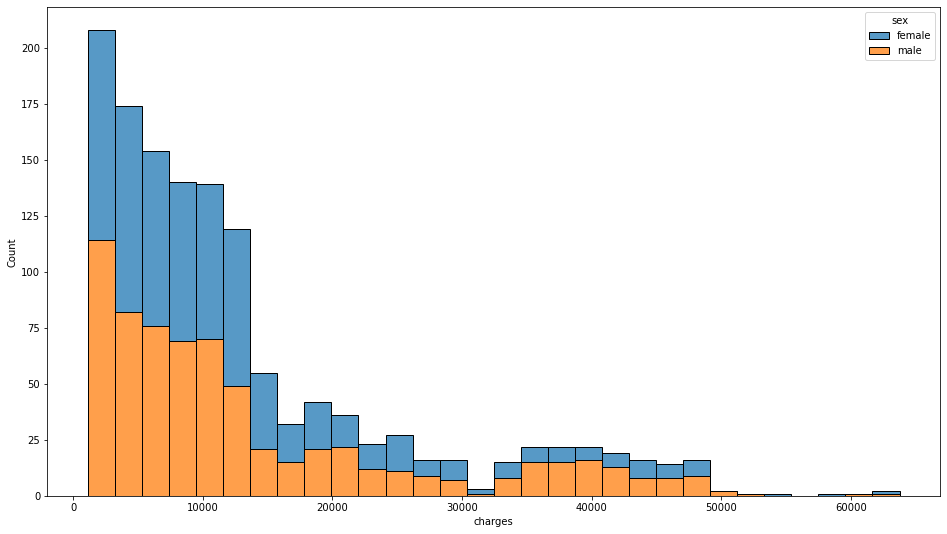

In [16]:
plt.figure(figsize=(16,9))
sns.histplot(data,x=data['charges'],hue=data['sex'],multiple='stack')

# Task 3

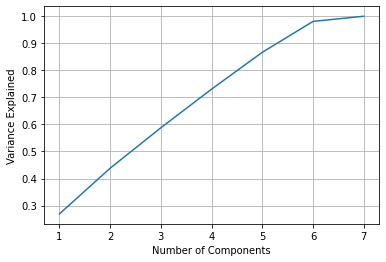

In [17]:
vr = []

for n in range(1,8):
    pca = PCA(n_components=n)
    pca.fit(x)
    
    vr.append(sum(pca.explained_variance_ratio_))
    
plt.plot(range(1,8),vr)
plt.grid()
plt.xlabel("Number of Components")
plt.ylabel("Variance Explained");

In [18]:
pca = PCA(n_components=6)
pc = pca.fit_transform(x)

In [19]:
dr=pd.DataFrame(pc)
dr

,0,1,2,3,4,5
0,0.865510,0.812083,-1.344438,-1.557905,1.941264,-0.364118
1,-1.138648,-0.244891,-1.751069,0.395993,-0.022993,0.551508
2,-0.705309,-0.641423,-0.880221,1.812120,0.391507,0.341514
3,-0.167003,1.283676,-0.565617,-0.096632,-0.902108,-0.743525
4,-1.025671,0.561317,-0.841474,-0.122670,-1.068473,-0.018272
...,...,...,...,...,...,...
1333,-0.062757,-0.437590,0.539992,1.931093,-0.608626,-0.054314
1334,-1.505781,1.102570,-0.022210,-0.997317,0.118007,1.628891
1335,-1.317180,-0.461392,-0.856748,-1.325000,0.797583,1.204355
1336,-1.580503,0.105705,-0.834984,-1.255946,1.373953,-0.630594


# Task 4

In [ ]:
def cluster(clustering='KMeans',):
    

In [ ]:
 cols = ['Age', 'Score', 'Gender','Income']
def make_kmeans(clustering='KMeans',attributes=cols, scaler=MinMaxScaler(), dimension_reduction='pca', components=2, k=3, show='features'):
    attributes = list(attributes)
    scaled_values = scaler.fit_transform(X[attributes])
    X_l=X.iloc[:, 0:3].values
    y_l=X.iloc[:, 3].values

    components = min(components, len(attributes))
    if dimension_reduction == 'pca':
        values = PCA().fit_transform(scaled_values)[:, :components]
    elif dimension_reduction == 'lda':
        values = LinearDiscriminantAnalysis(n_components=2).fit_transform(X_l,y_l)[:, :components]
    else:
        values = scaled_values

    cluster = KMeans(n_clusters=k).fit_predict(values)

    if show == 'features':
        df_plot = X.astype(float).copy()
    elif show == 'values':
        df_plot = pd.DataFrame(values)

    df_plot['cluster'] = cluster

    sns.pairplot(df_plot, hue="cluster", diag_kind = 'hist', diag_kws={'alpha':0.5}, vars=[c for c in df_plot.columns if c != 'cluster'])
style = {'description_width': '150px'}
layout = widgets.Layout(width='400px')
i = interact(make_kmeans, attributes=widgets.SelectMultiple(options=cols, value=cols, rows=len(cols),
                                                            description='Features', layout=layout, style=style,
                                                            disabled=False,continuous_update=False,orientation='horizontal',
                                                            readout=True),
             scaler=widgets.RadioButtons(options=[ ('Z-Transform', StandardScaler()), ('Min-Max', MinMaxScaler()), ('None', FunctionTransformer(validate=False))],
                                         description='Scaler', layout=layout, style=style,disabled=False,continuous_update=False,orientation='horizontal',readout=True),
              dimension_reduction=widgets.RadioButtons(options=[('PCA', 'pca'), ('LDA', 'lda'), ('without', None)],
                                                       description='Dimensionality Reduction', layout=layout, style=style,
                                                       disabled=False,continuous_update=False,orientation='horizontal',readout=True),
             components=widgets.SelectionSlider(options=range(1, 5), value=4,description='PCA components',
                                                layout=layout, style=style,
                                                disabled=False,continuous_update=False,orientation='horizontal',readout=True),
             k=widgets.SelectionSlider(options=range(2, 8),description='k', layout=layout, style=style,
                                       disabled=False,continuous_update=False,orientation='horizontal',readout=True),
              show=widgets.RadioButtons(options=[('Features', 'features'), ('Values', 'values')],description='Show',
                                        layout=layout, style=style,
                                        disabled=False,continuous_update=False,orientation='horizontal',readout=True))




## K-Means

#### Without dimension reduction

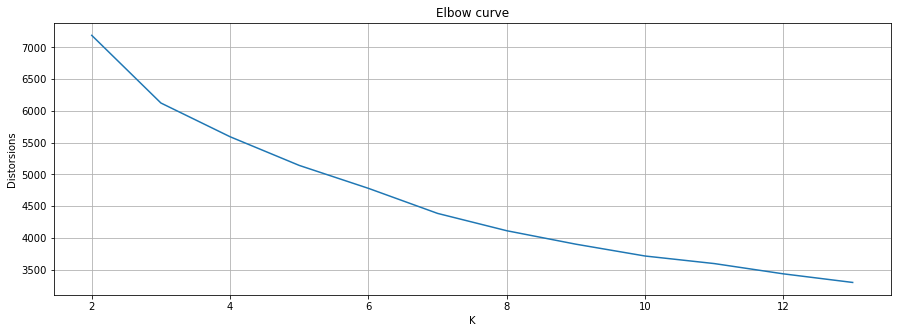

In [22]:
dis = []
for k in range(2, 14):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    dis.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 14), dis)
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Distorsions')
plt.title('Elbow curve');

In [23]:
range_n_clusters = list(range(2,12))
silhouette_avg_n_clusters = []
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(x)

    silhouette_avg = silhouette_score(x, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.30391609370971484
For n_clusters = 3 The average silhouette_score is : 0.2097885699078078
For n_clusters = 4 The average silhouette_score is : 0.1843714250139503
For n_clusters = 5 The average silhouette_score is : 0.19365497845467647
For n_clusters = 6 The average silhouette_score is : 0.18326635233893415
For n_clusters = 7 The average silhouette_score is : 0.1952388745637428
For n_clusters = 8 The average silhouette_score is : 0.19835105162306504
For n_clusters = 9 The average silhouette_score is : 0.19593188682668827
For n_clusters = 10 The average silhouette_score is : 0.20744179325139706
For n_clusters = 11 The average silhouette_score is : 0.20425056347995812


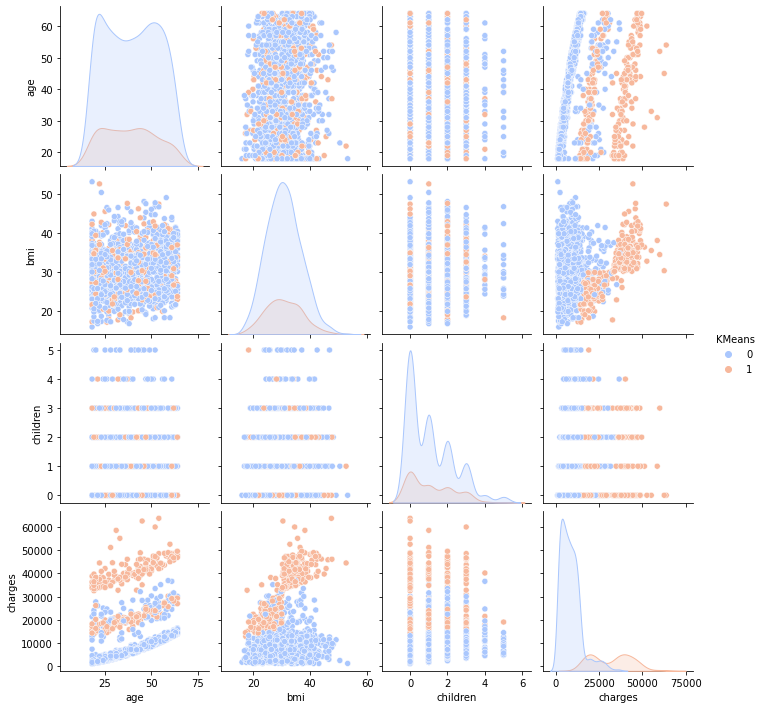

In [38]:
km=KMeans(n_clusters=2)
y_pred=km.fit_predict(x)

df['KMeans']=y_pred

sns.pairplot(data=df,hue='KMeans',palette='coolwarm')

#### With dimension reduction

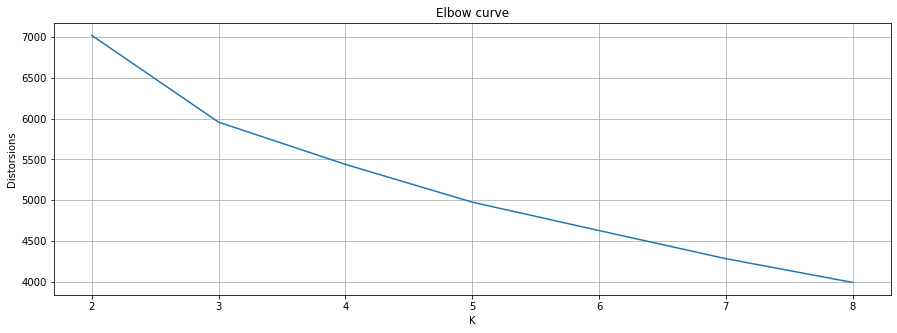

In [39]:
dis = []
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pc)
    dis.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 9), dis)
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Distorsions')
plt.title('Elbow curve');

In [40]:
range_n_clusters = list(range(2,12))
silhouette_avg_n_clusters = []
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(pc)

    silhouette_avg = silhouette_score(pc, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.30427971215080124
For n_clusters = 3 The average silhouette_score is : 0.21408437879937275
For n_clusters = 4 The average silhouette_score is : 0.18844789173902968
For n_clusters = 5 The average silhouette_score is : 0.18574494998050836
For n_clusters = 6 The average silhouette_score is : 0.19478642497447832
For n_clusters = 7 The average silhouette_score is : 0.19470211947327584
For n_clusters = 8 The average silhouette_score is : 0.193391901759544
For n_clusters = 9 The average silhouette_score is : 0.19381395229637832
For n_clusters = 10 The average silhouette_score is : 0.20710195901014902
For n_clusters = 11 The average silhouette_score is : 0.20099534226982388


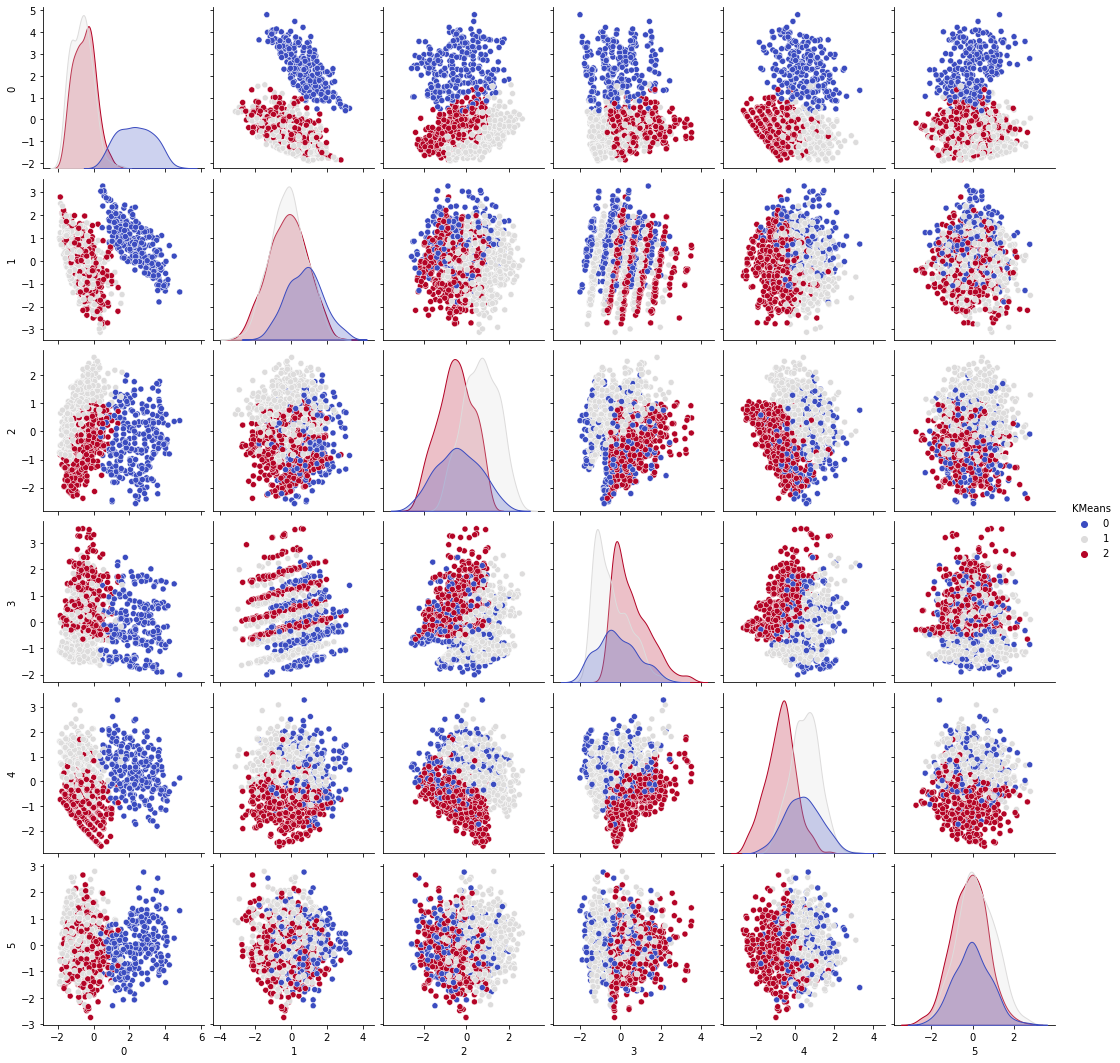

In [41]:
km=KMeans(n_clusters=3)
y_pred=km.fit_predict(pc)
dr['KMeans']=y_pred
sns.pairplot(data=dr,hue='KMeans',diag_kind='kde',palette='coolwarm')

### Heirarchal

#### Without dimension reduction

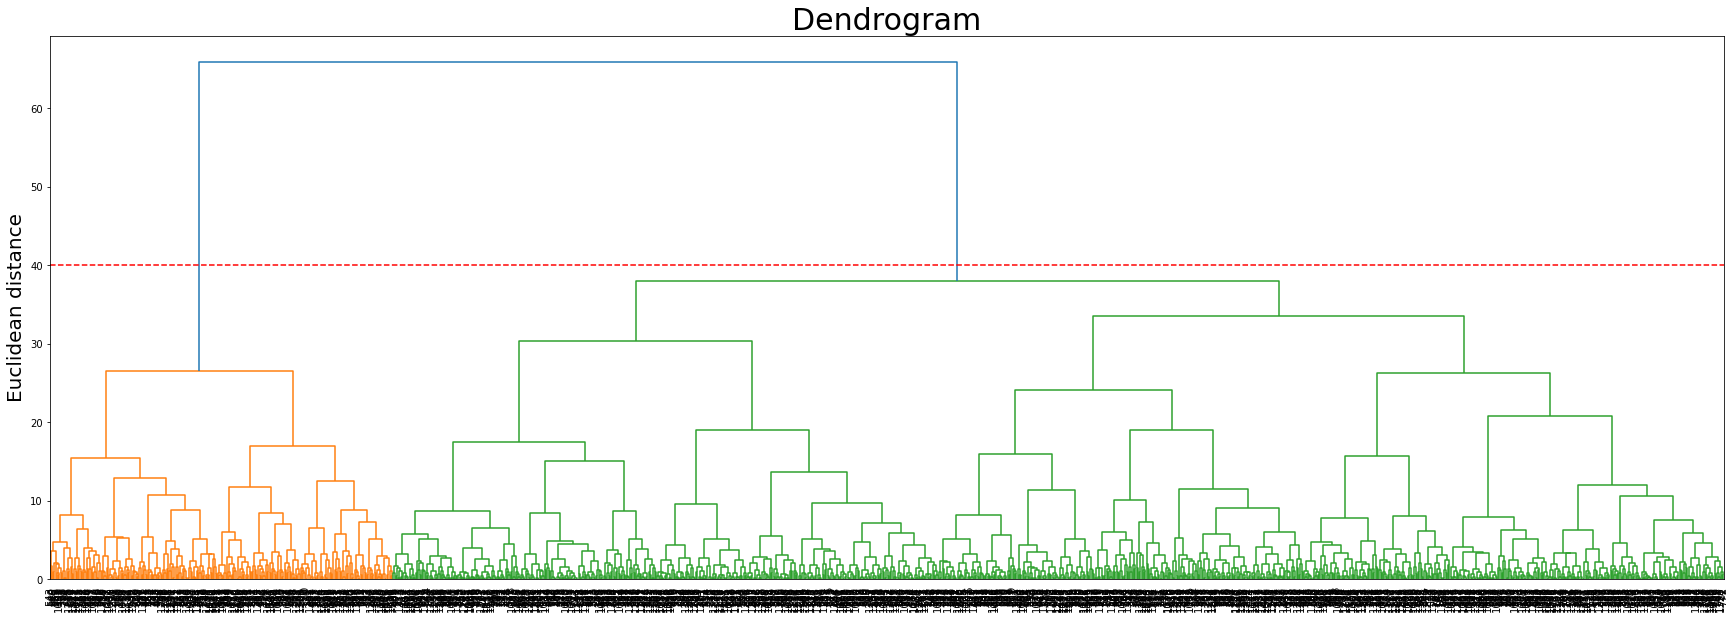

In [46]:
plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(x, method = 'ward'),labels=df.index)
plt.axhline(y=40, color='r', linestyle='--')
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('Dendrogram',fontsize=30)

plt.ylabel('Euclidean distance', fontsize=20)
plt.show()

In [ ]:
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)
df['hir']=y_hc
sns.pairplot(data=df,hue='hir',diag_kind='kde',palette='coolwarm')

#### With dimension reduction

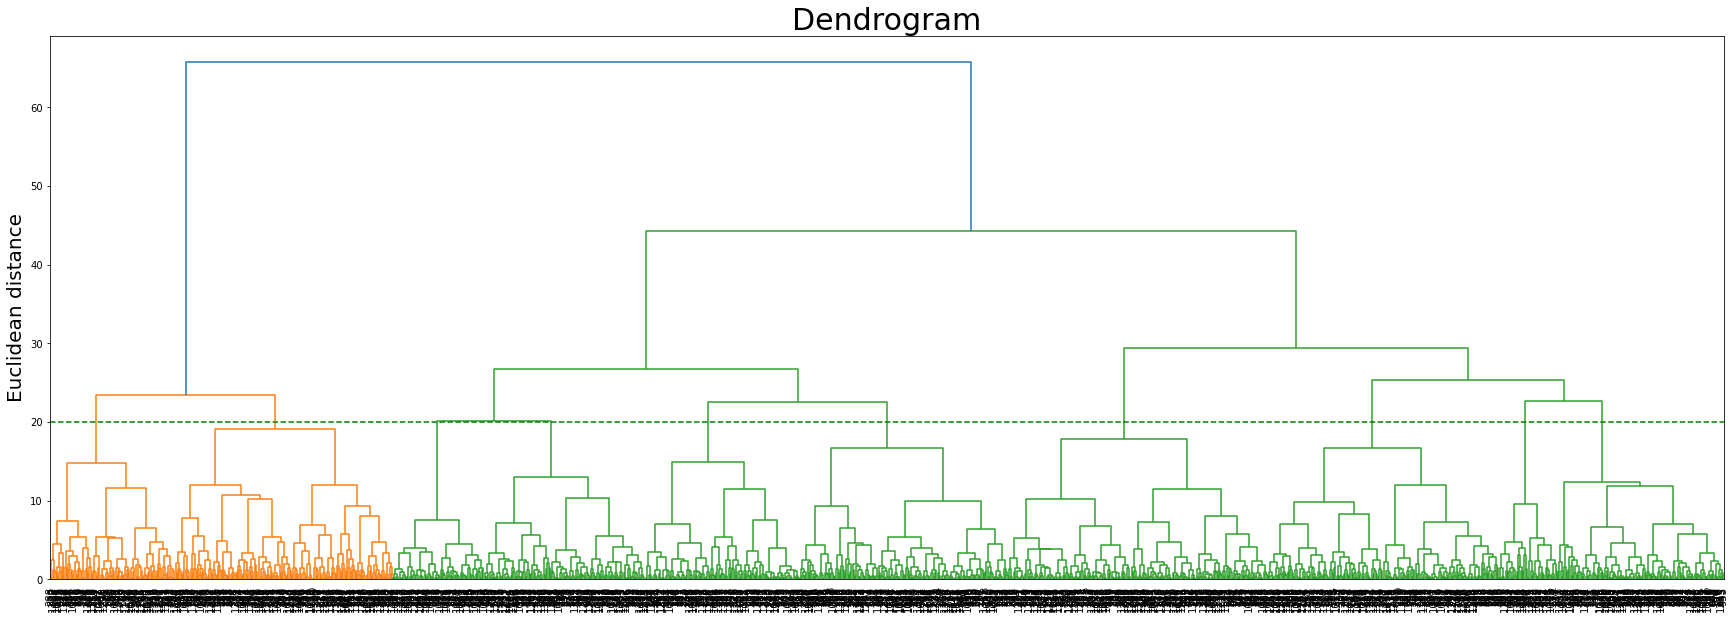

In [47]:
plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(pc, method = 'ward'))
plt.axhline(y=20, color='g', linestyle='--')
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('Dendrogram',fontsize=30)

plt.ylabel('Euclidean distance', fontsize=20)
plt.show()

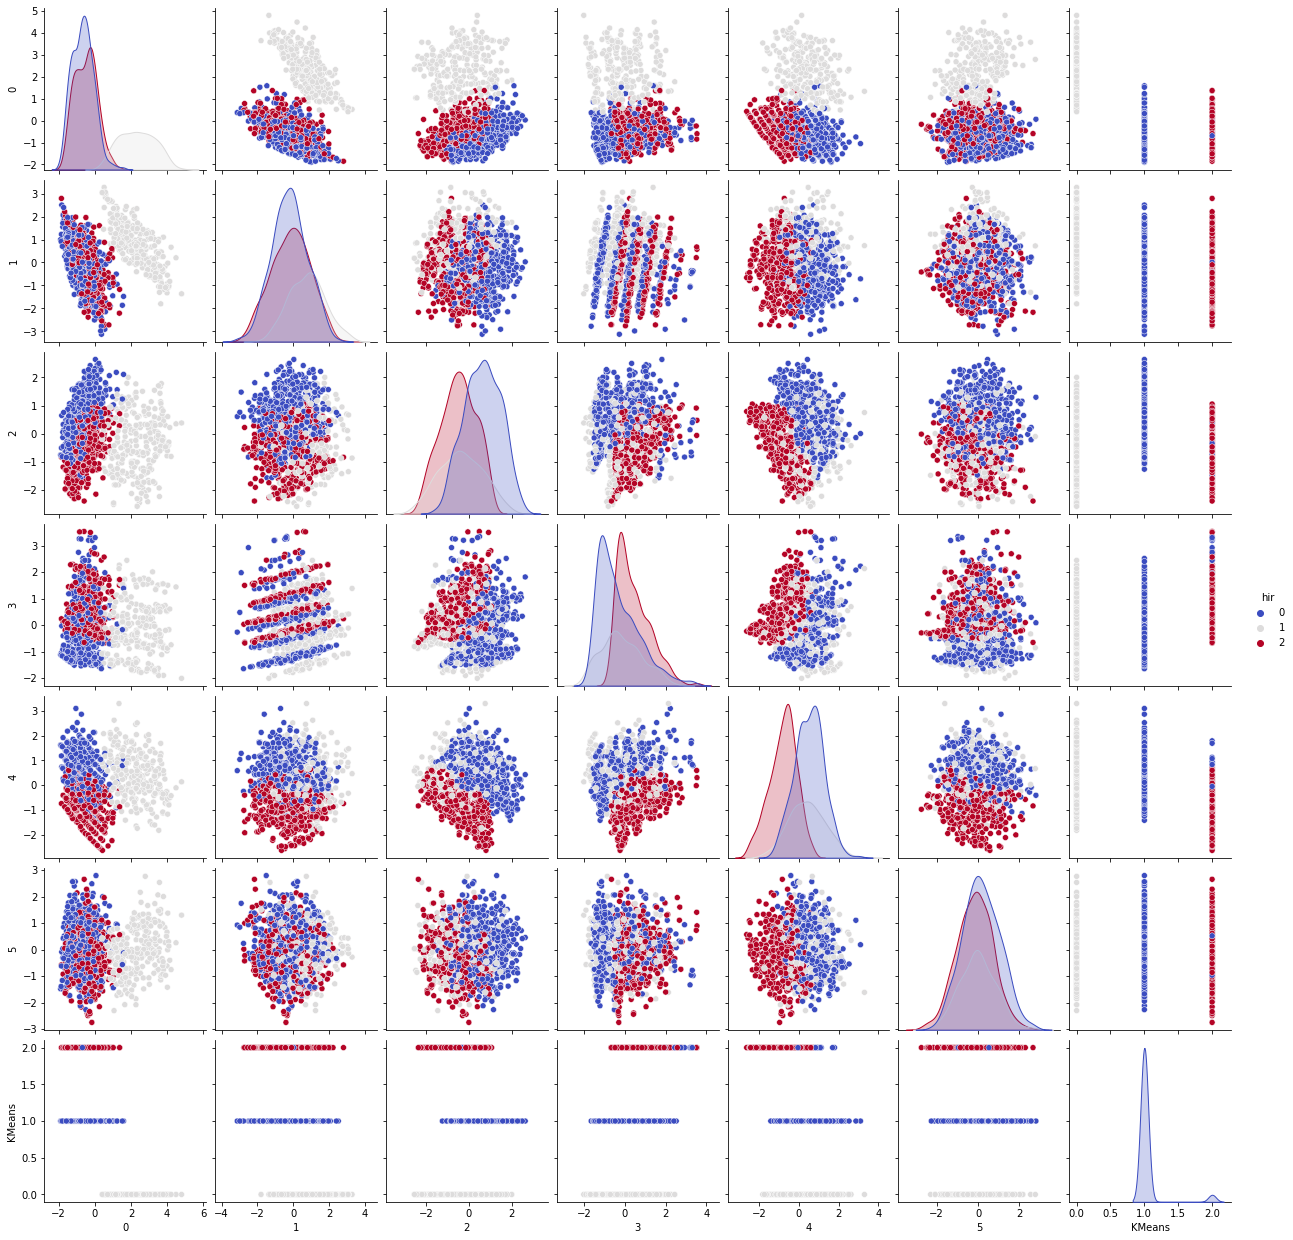

In [48]:
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(pc)
dr['hir']=y_hc
sns.pairplot(data=dr,hue='hir',diag_kind='kde',palette='coolwarm')

### DBSCAN

#### Without dimension reduction

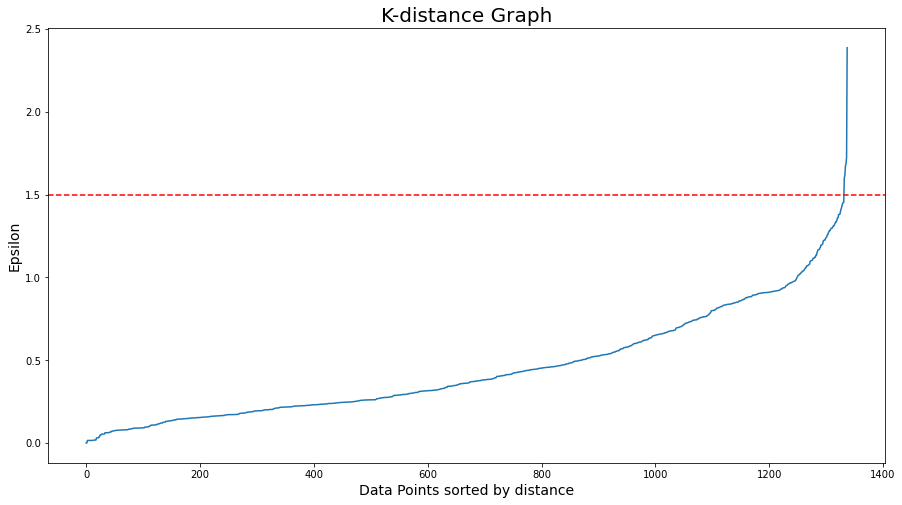

In [52]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(x)
distances, indices = nbrs.kneighbors(x)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(15,8))
plt.plot(distances)
plt.axhline(y=1.5, color='r', linestyle='--')
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [56]:
eps=1.5
for min_samples in range(2,30):
    clusterer = DBSCAN(eps=eps, min_samples=min_samples)
    cluster_labels = clusterer.fit_predict(x)

    X= cluster_labels +2
    y = np.bincount(X)
    ii = np.nonzero(y)[0]
    results = list(zip(ii,y[ii]) )
    print('eps=',eps,'| min_samples= ', min_samples, '| obtained clustering: ', results)

eps= 1.5 | min_samples=  2 | obtained clustering:  [(1, 6), (2, 112), (3, 516), (4, 547), (5, 157)]
eps= 1.5 | min_samples=  3 | obtained clustering:  [(1, 6), (2, 112), (3, 516), (4, 547), (5, 157)]
eps= 1.5 | min_samples=  4 | obtained clustering:  [(1, 10), (2, 111), (3, 514), (4, 546), (5, 157)]
eps= 1.5 | min_samples=  5 | obtained clustering:  [(1, 14), (2, 109), (3, 514), (4, 546), (5, 155)]
eps= 1.5 | min_samples=  6 | obtained clustering:  [(1, 14), (2, 109), (3, 514), (4, 546), (5, 155)]
eps= 1.5 | min_samples=  7 | obtained clustering:  [(1, 20), (2, 105), (3, 512), (4, 546), (5, 155)]
eps= 1.5 | min_samples=  8 | obtained clustering:  [(1, 26), (2, 100), (3, 511), (4, 546), (5, 155)]
eps= 1.5 | min_samples=  9 | obtained clustering:  [(1, 34), (2, 94), (3, 511), (4, 545), (5, 154)]
eps= 1.5 | min_samples=  10 | obtained clustering:  [(1, 37), (2, 93), (3, 511), (4, 543), (5, 154)]
eps= 1.5 | min_samples=  11 | obtained clustering:  [(1, 39), (2, 93), (3, 510), (4, 543), (5,

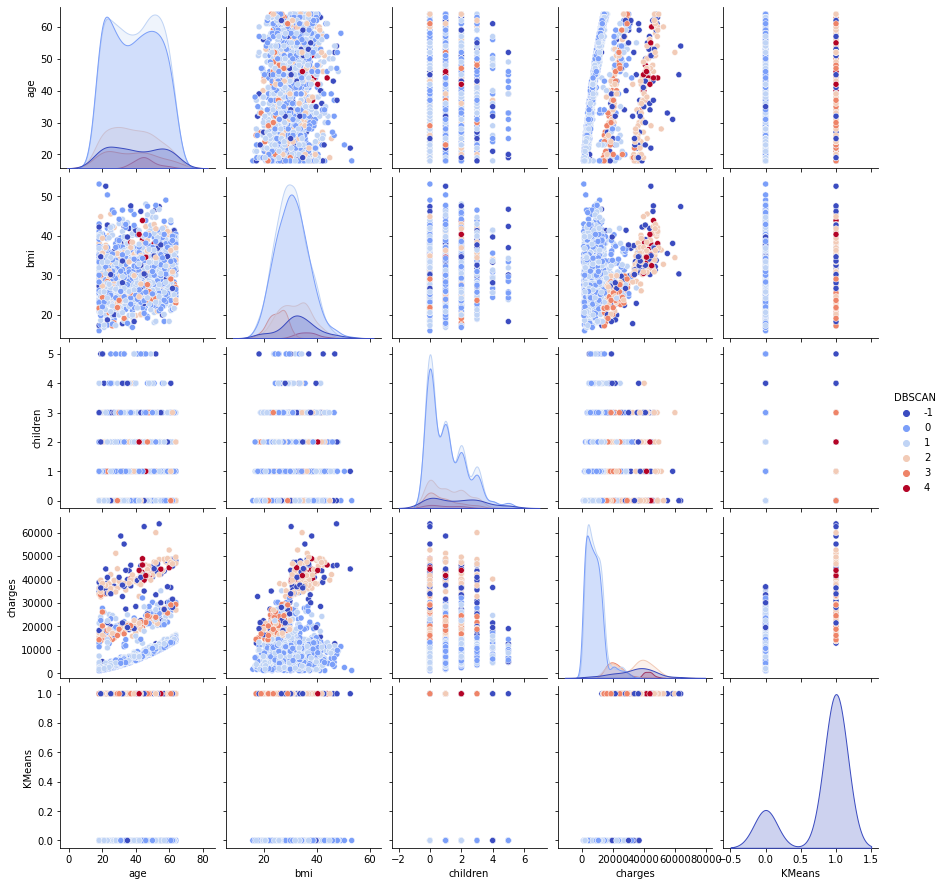

In [67]:
db_o=DBSCAN(eps=1.5,min_samples=14)
db_o.fit(x)
y_db=db_o.labels_
df['DBSCAN']=y_db

sns.pairplot(data=df.iloc[:,[0,1,2,3,4,5,6,7,8]],hue='DBSCAN',palette='coolwarm')

In [66]:
df['DBSCAN'].unique()

array([0], dtype=int64)

#### With dimension reduction

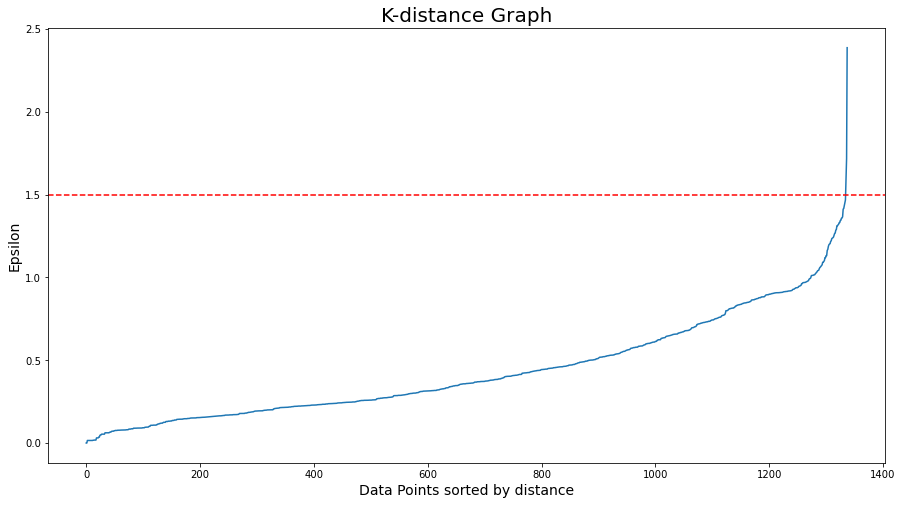

In [69]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(pc)
distances, indices = nbrs.kneighbors(pc)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(15,8))
plt.plot(distances)
plt.axhline(y=1.5, color='r', linestyle='--')
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

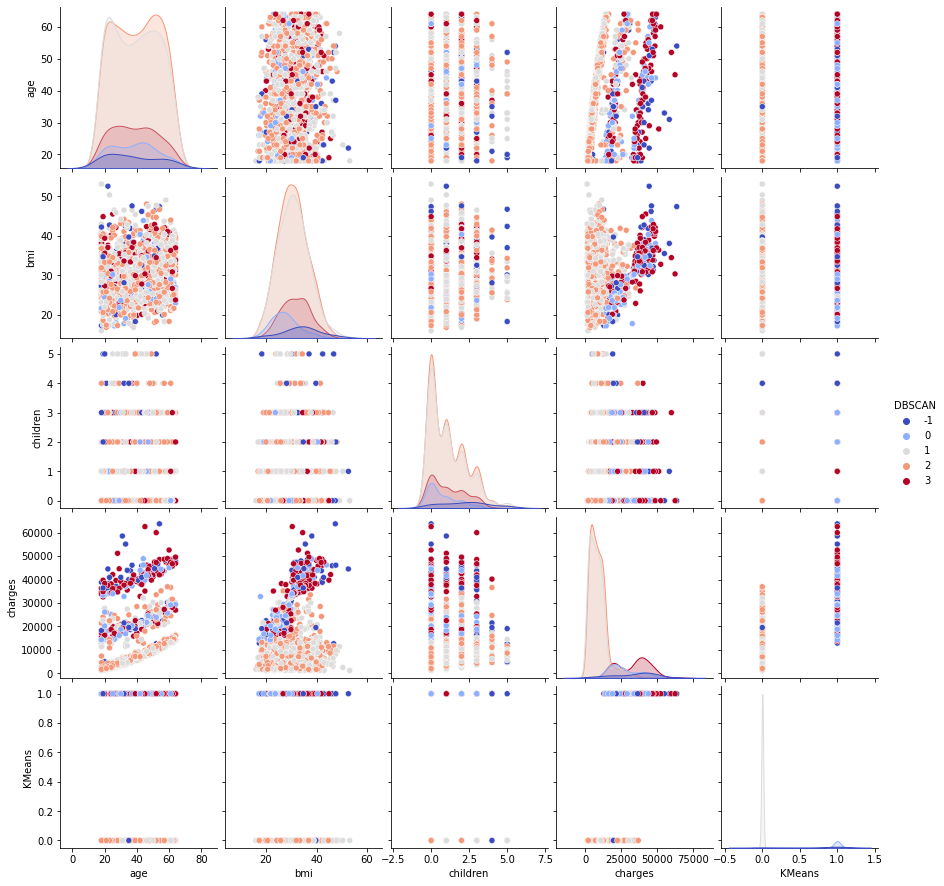

In [71]:
db_opt=DBSCAN(eps=1.5,min_samples=14)
db_opt.fit(pc)
y_db=db_opt.labels_
df['DBSCAN']=y_db

sns.pairplot(data=df.iloc[:,[0,1,2,3,4,5,6,7,8]],hue='DBSCAN',palette='coolwarm')